In [139]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [67]:
source_train_df = pd.read_csv("train.csv")

source_train_df.head()

Choice  A_follower_count  A_following_count  A_listed_count  \
0       0               228                302               3   
1       0             21591               1179             228   
2       0              7310               1215             101   
3       0                20                  7               2   
4       1             45589                862            2641   

   A_mentions_received  A_retweets_received  A_mentions_sent  A_retweets_sent  \
0             0.583979             0.100503         0.100503         0.100503   
1            90.456506            25.798292         5.709329         1.111159   
2            25.503644             9.556347         5.361519         0.591206   
3             7.690824             0.277306         1.331508         0.100503   
4           148.854279            36.998884        27.881768         3.333492   

     A_posts  A_network_feature_1  ...  B_following_count  B_listed_count  \
0   0.362150                    2  ...              29808            1689   
1   5.176620                  369  ...                848            1610   
2   3.589718                   95  ...                482             206   
3   2.830627                    6  ...              17637             278   
4  23.861282                  551  ...               1711             181   

   B_mentions_received  B_retweets_received  B_mentions_sent  B_retweets_sent  \
0            15.430498             3.984029         8.204331         0.332423   
1            40.495021             8.943607         3.227677         0.564343   
2             0.734696             0.354379         0.603202         0.100503   
3           572.874856           390.293681        27.552040         7.167557   
4            21.601866             3.581661         6.764657         1.119727   

     B_posts  B_network_feature_1  B_network_feature_2  B_network_feature_3  
0   6.988815                   66            75.530303          1916.893939  
1   1.070321                  163           132.030675          2931.515337  
2   0.603202                    3            10.333333           277.333333  
3  32.101906                 1762            23.469296          1395.845634  
4   4.563246                   85            48.500000          1993.627907  

[5 rows x 23 columns]

In [68]:
source_train_df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [69]:
source_train_df.isna().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

C:\Users\Pal\AppData\Local\Temp\ipykernel_28900\3043681349.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.pyplot.figure(figsize=(6, 3))


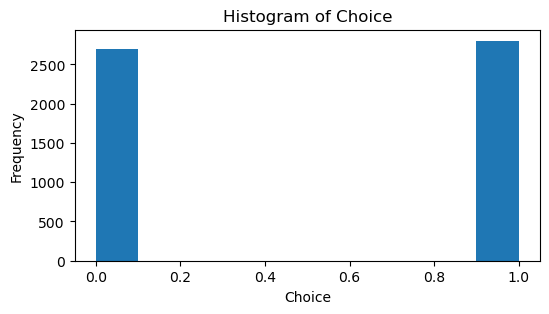

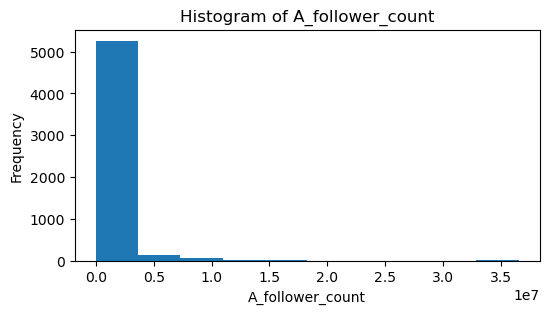

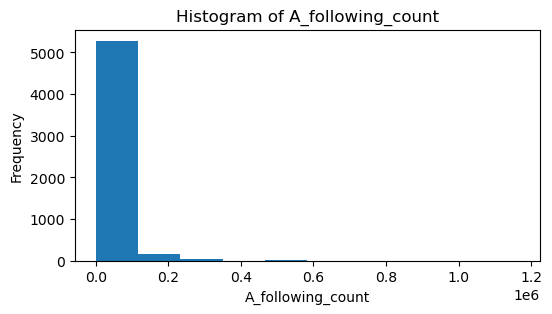

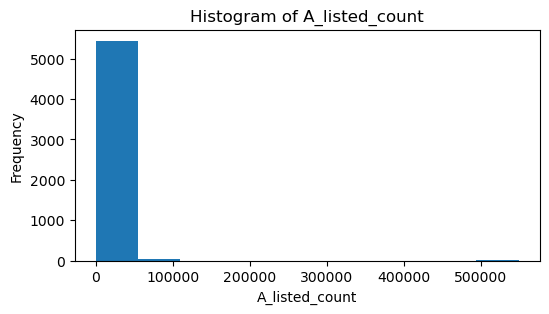

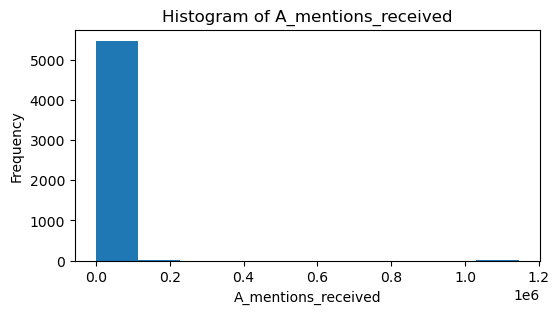

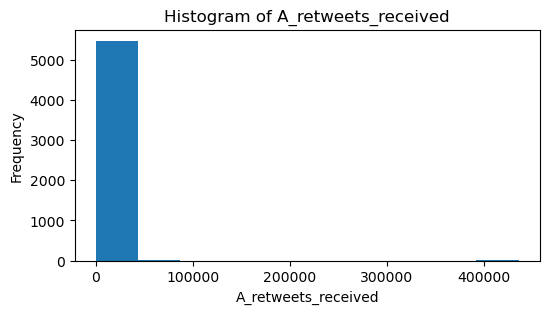

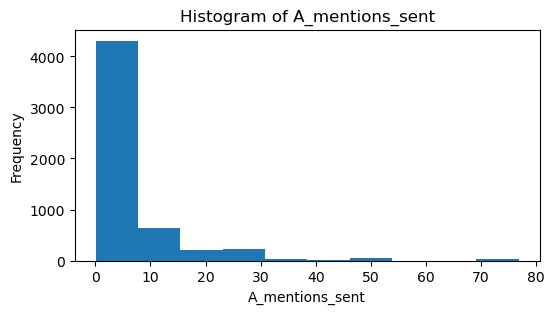

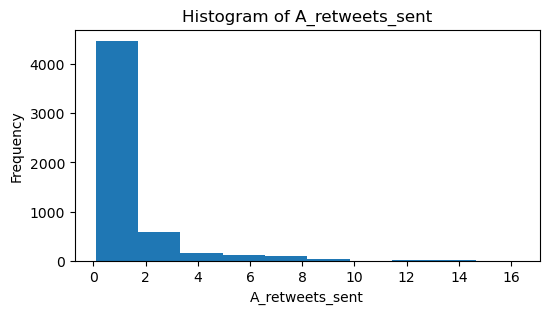

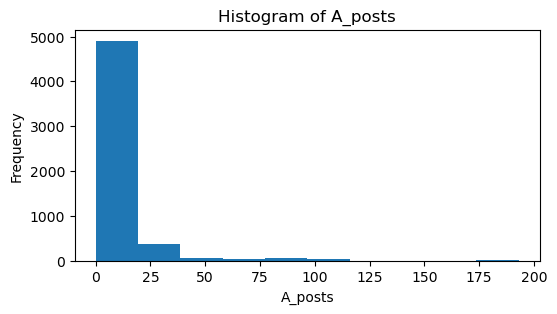

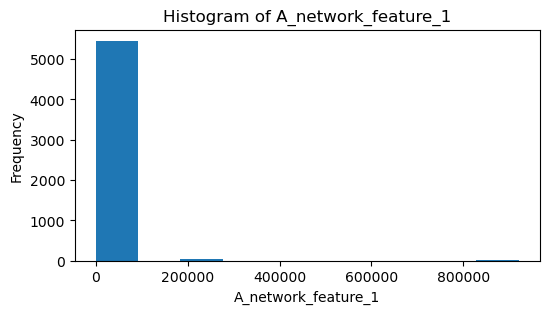

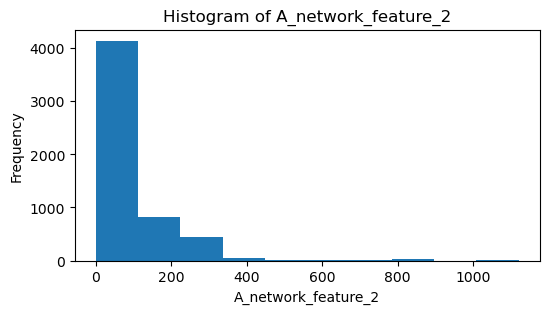

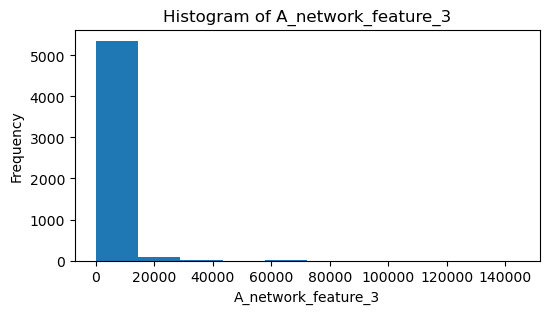

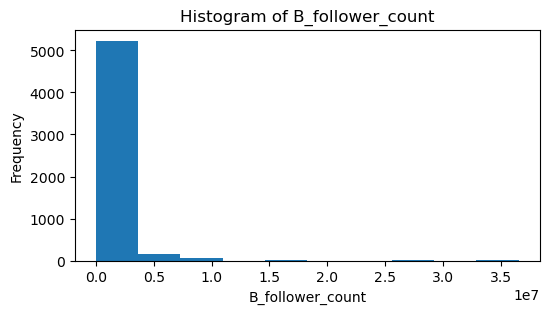

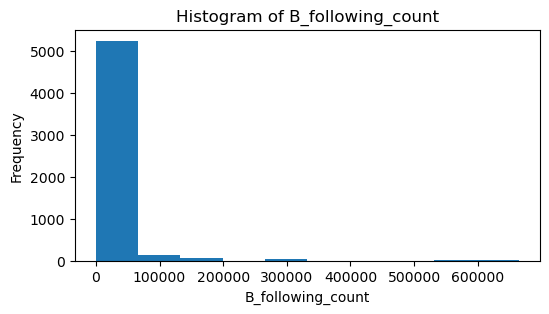

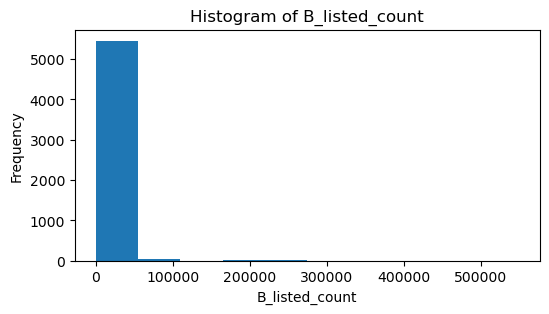

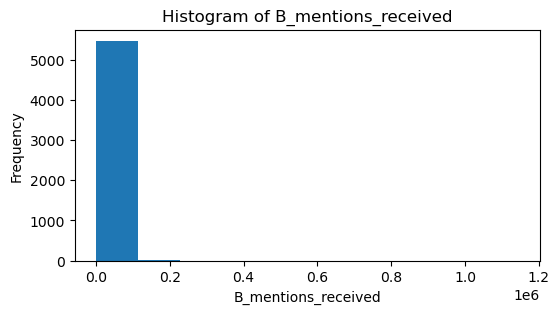

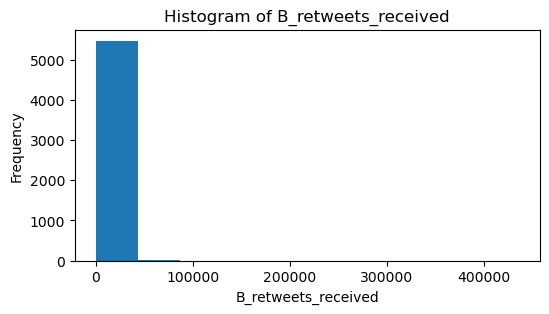

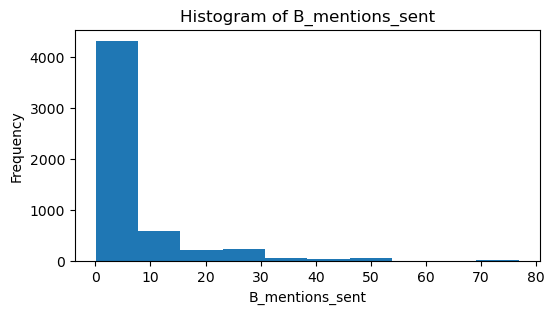

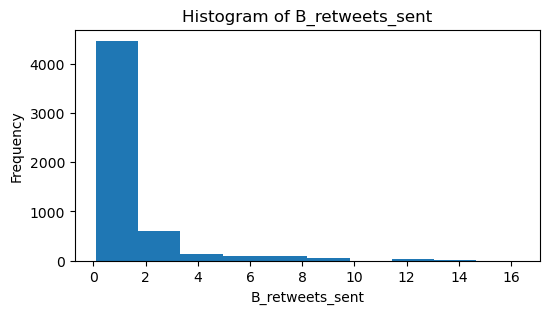

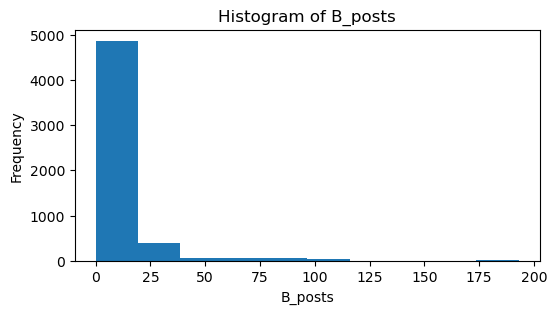

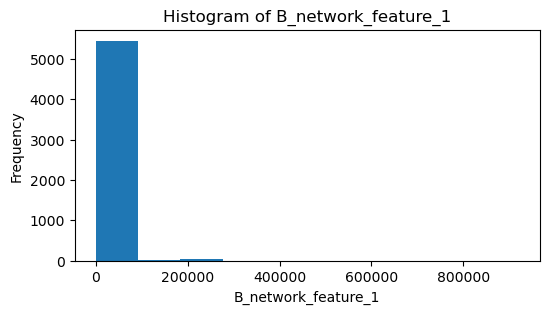

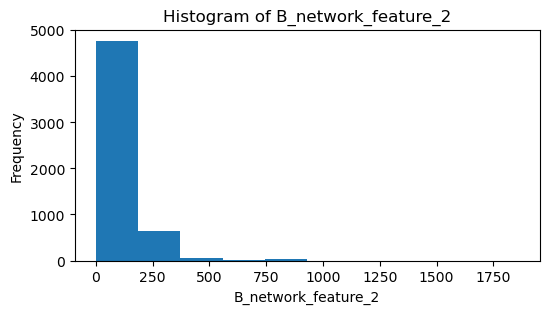

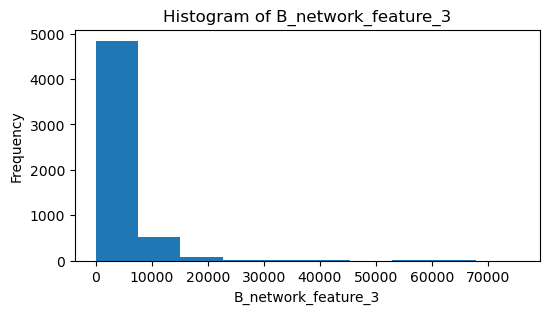

In [70]:
#plot the histograms and count distribution for all the present attributes
for column_name, column_data_type in source_train_df.dtypes.items():
    if column_data_type=='object' :
        plt.pyplot.figure(figsize=(6, 3))
        source_train_df[column_name].value_counts()[:20].plot(kind='bar',
                                    figsize=(8,3),
                                    title="Count Distribution of "+column_name)
    else:
        plt.pyplot.figure(figsize=(6, 3))
        plt.pyplot.hist(source_train_df[column_name])
        plt.pyplot.xlabel(column_name)
        plt.pyplot.ylabel('Frequency')
        plt.pyplot.title("Histogram of "+column_name)

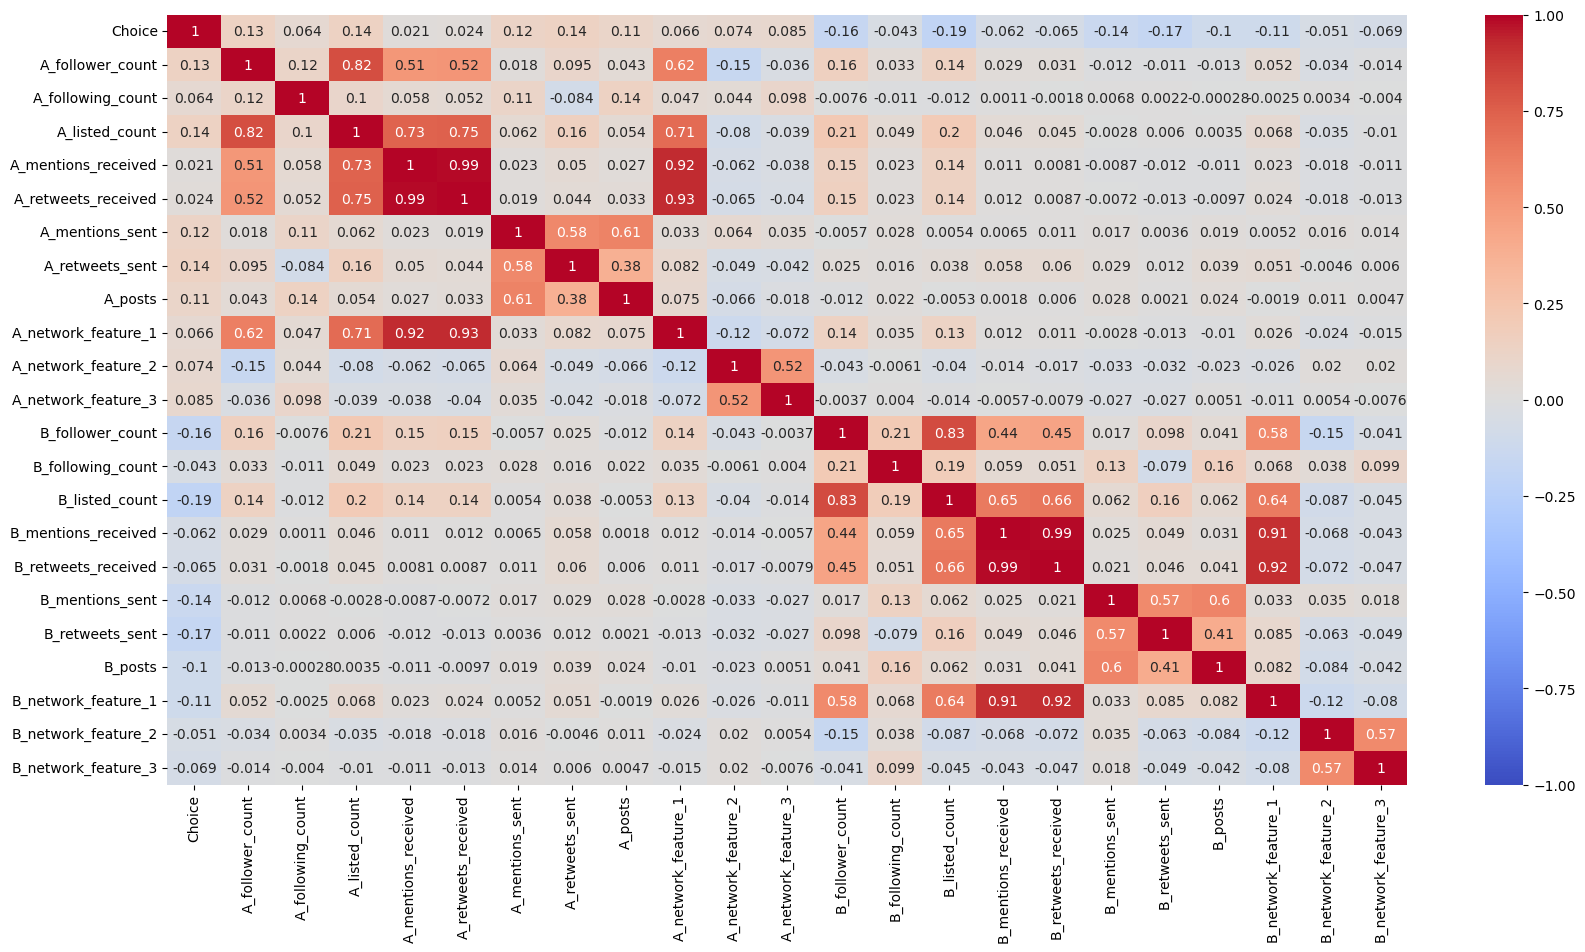

In [71]:
#plot the correlation matrix of the fields as a heat map
plt.pyplot.figure(figsize=(20, 10))
sns.heatmap(source_train_df.corr(), vmax=1, vmin=-1,  cmap="coolwarm", annot=True)
plt.pyplot.show()

In [72]:
reqd_columns_suffix = [col_name.replace('A_','') for col_name in source_test_df.columns if 'A_' in col_name \
                       and col_name!='A_mentions_received'\
                        and col_name!='A_retweets_received']

reqd_columns_suffix

['follower_count',
 'following_count',
 'listed_count',
 'mentions_sent',
 'retweets_sent',
 'posts',
 'network_feature_1',
 'network_feature_2',
 'network_feature_3']

## TBD WITH TEAM

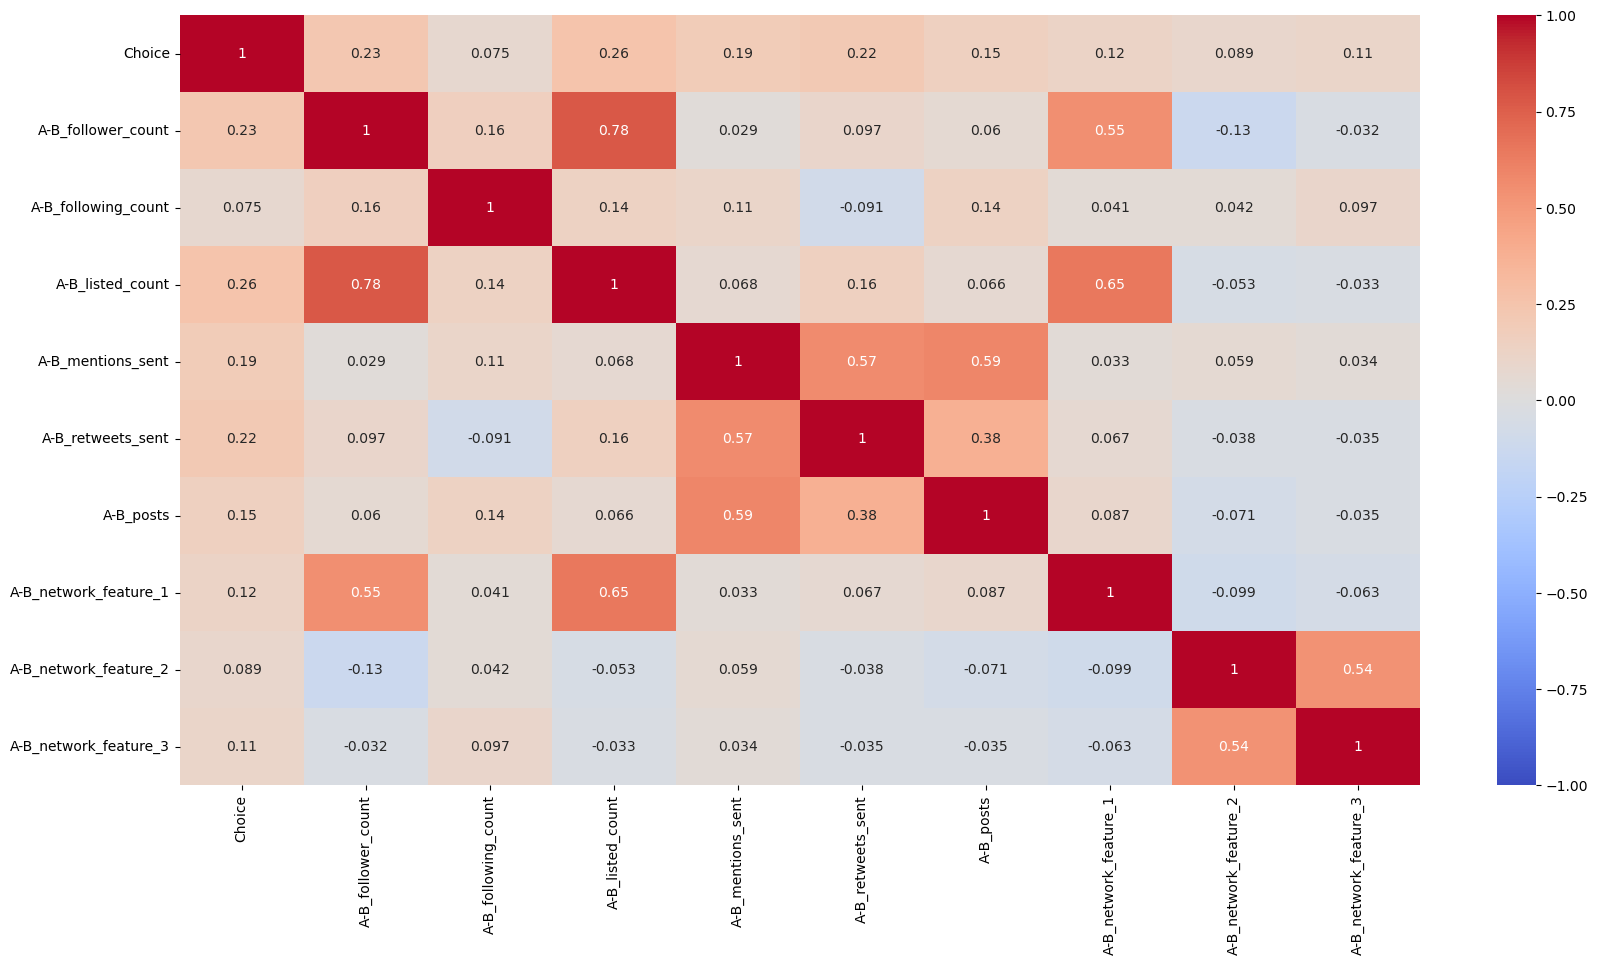

In [73]:
train_df = source_train_df.__deepcopy__()
train_df.drop(['A_mentions_received', 'B_mentions_received'], axis=1, inplace=True)
train_df.drop(['A_retweets_received', 'B_retweets_received'], axis=1, inplace=True)
for column_name in reqd_columns_suffix:
    train_df['A-B_'+column_name] = train_df['A_'+column_name] - train_df['B_'+column_name]
    train_df.drop(['A_'+column_name, 'B_'+column_name], axis=1, inplace=True)

plt.pyplot.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), vmax=1, vmin=-1,  cmap="coolwarm", annot=True)
plt.pyplot.show()

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_df_normalized = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)


train_df_normalized.head()

Choice  A-B_follower_count  A-B_following_count  A-B_listed_count  \
0     0.0            0.507400             0.347553          0.510798   
1     0.0            0.507632             0.363888          0.511084   
2     0.0            0.507932             0.364108          0.512285   
3     0.0            0.507606             0.354055          0.512124   
4     1.0            0.508414             0.363242          0.514698   

   A-B_mentions_sent  A-B_retweets_sent  A-B_posts  A-B_network_feature_1  \
0           0.447178           0.496772   0.482830               0.501019   
1           0.516176           0.521014   0.510640               0.501167   
2           0.531015           0.519267   0.507738               0.501104   
3           0.329091           0.283996   0.424157               0.500097   
4           0.637644           0.572905   0.550002               0.501308   

   A-B_network_feature_2  A-B_network_feature_3  
0               0.659024               0.386341  
1               0.588358               0.335476  
2               0.647840               0.369221  
3               0.620181               0.336865  
4               0.654856               0.346725

In [75]:
from sklearn.model_selection import train_test_split

X = train_df_normalized.drop('Choice', axis=1)  # Features
y = train_df_normalized['Choice']  # Target variable

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


logreg_model = LogisticRegression(random_state=123)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.66       530
         1.0       0.68      0.71      0.69       570

    accuracy                           0.68      1100
   macro avg       0.68      0.68      0.68      1100
weighted avg       0.68      0.68      0.68      1100



In [77]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': logreg_model.coef_[0]})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

# Display the coefficients, sorted by absolute coefficient value
sorted_coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
print(sorted_coefficients)

                 Feature  Coefficient  Abs_Coefficient
0     A-B_follower_count     7.391954         7.391954
2       A-B_listed_count     5.712535         5.712535
4      A-B_retweets_sent     4.284029         4.284029
7  A-B_network_feature_2     2.701191         2.701191
8  A-B_network_feature_3     2.548791         2.548791
6  A-B_network_feature_1     2.056541         2.056541
1    A-B_following_count     1.934663         1.934663
3      A-B_mentions_sent     1.627347         1.627347
5              A-B_posts     0.961734         0.961734


In [78]:
tweets_df = pd.read_csv("tweets.csv")

tweets_df.head(5)

ids      screen_name   followers   retweet  inreplyto   favorite  \
0  1.409150e+18  2Sherryazar1956        1992         1        NaN          0   
1  1.049790e+18    TrueCrimePoli         652         8        NaN          0   
2  1.357290e+18    WintWahLwin15         118       162        NaN          0   
3  3.617900e+09   england_donald         523        65        NaN          0   
4  1.360330e+18   Brenda18291262         280       314        NaN          0   

    friends   listed      location  \
0      2475        0  NW Arkansas    
1       846        0    Boston, MA   
2       313        0           NaN   
3       263        2  Florida, USA   
4       724        0           NaN   

                                                text  
0  RT @jimmichael720: Biden doesn't have the ball...  
1  RT @ChrisStigall: Biden says\n\nBiden says inf...  
2  RT @ForeignPolicy: "A U.S.-India alliance woul...  
3  RT @CoryMillsFL: While Bidens State Department...  
4  RT @Chicago1Ray: If Illegals can file suit on ...

In [142]:
import re

tweet_df = pd.DataFrame(columns=['Column_1', 'Column_2', 'Column_3'])

for i in range(len(tweets_df)):
    #i=8#144#23 #146

    text = tweets_df.iloc[i]["text"] #23 #146
    sender_acct = tweets_df.iloc[i][" screen_name"]

    retweet_acct=''

    reply_acct = []
    mention_acct = []


    retweet_pattern = r"RT @(.*?):"

    try:
        retweet_acct = re.findall(retweet_pattern, text)[0]

        data = {'Column_1': [sender_acct, retweet_acct], 'Column_2': [retweet_acct]*2, 'Column_3': ['Retweet','Tweet']}
        tweet_row_df = pd.DataFrame(data)

    except:
        retweet_acct=''

        mention_and_reply_pattern = r"@(.*?) "

        mentioned_and_reply_acct = re.findall(mention_and_reply_pattern, text)

        for acct in mentioned_and_reply_acct:
            if text.startswith('@'+acct):
                reply_acct.append(acct)
                text = text.replace('@'+acct,'').strip()

        mention_acct = [acct for acct in mentioned_and_reply_acct if acct not in reply_acct]

        if (len(reply_acct) + len(mention_acct)) > 0:
            data = {'Column_1': [sender_acct]*(len(reply_acct) + len(mention_acct)),\
                    'Column_2': reply_acct+mention_acct,\
                        'Column_3': (['Reply']*len(reply_acct)) + (['Mention']*len(mention_acct))}
            
            tweet_row_df = pd.DataFrame(data)

        else:
            data = {'Column_1': [sender_acct], 'Column_2': [sender_acct], 'Column_3': ['Tweet']}
            tweet_row_df = pd.DataFrame(data)

    tweet_df = tweet_df.append(tweet_row_df, ignore_index=True)


tweet_df.to_csv("Network_Input.csv")